# DS Automation Assignment

Using our prepared churn data from week 2:
- use pycaret to find an ML algorithm that performs best on the data
    - Choose a metric you think is best to use for finding the best model; by default, it is accuracy but it could be AUC, precision, recall, etc. The week 3 FTE has some information on these different metrics.
- save the model to disk
- create a Python script/file/module with a function that takes a pandas dataframe as an input and returns the probability of churn for each row in the dataframe
    - your Python file/function should print out the predictions for new data (new_churn_data.csv)
    - the true values for the new data are [1, 0, 0, 1, 0] if you're interested
- test your Python module and function with the new data, new_churn_data.csv
- write a short summary of the process and results at the end of this notebook
- upload this Jupyter Notebook and Python file to a Github repository, and turn in a link to the repository in the week 5 assignment dropbox

*Optional* challenges:
- return the probability of churn for each new prediction, and the percentile where that prediction is in the distribution of probability predictions from the training dataset (e.g. a high probability of churn like 0.78 might be at the 90th percentile)
- use other autoML packages, such as TPOT, H2O, MLBox, etc, and compare performance and features with pycaret
- create a class in your Python module to hold the functions that you created
- accept user input to specify a file using a tool such as Python's `input()` function, the `click` package for command-line arguments, or a GUI
- Use the unmodified churn data (new_unmodified_churn_data.csv) in your Python script. This will require adding the same preprocessing steps from week 2 since this data is like the original unmodified dataset from week 1.

In [122]:
import pandas as pd
import numpy as np
from pycaret.classification import predict_model, ClassificationExperiment, load_model


# Replace 'path_to_csv' with the actual file path to your CSV file
file_path = 'C:/Users/btjkl/Downloads/clean_churn_data.csv'

# Load the data into a Pandas DataFrame
df = pd.read_csv(file_path)

# Drop the 'customerID' column
df = df.drop(columns=["customerID"])

# Convert any potential infinite values or NaNs to a finite number (e.g., 0)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

# Display the first few rows of the DataFrame to verify the data loading
print(df.head())


   tenure  PhoneService  Contract  PaymentMethod  MonthlyCharges  \
0       1             0         0              2           29.85   
1      34             1         1              3           56.95   
2       2             1         0              3           53.85   
3      45             0         1              0           42.30   
4       2             1         0              2           70.70   

   TotalCharges  Churn  TotalCharges_to_tenure  
0         29.85      0               29.850000  
1       1889.50      0               55.573529  
2        108.15      1               54.075000  
3       1840.75      0               40.905556  
4        151.65      1               75.825000  


In [123]:
from pycaret.classification import ClassificationExperiment #setup, compare_models, predict_model, save_model, load_model

In [124]:
automl = ClassificationExperiment() #setup(df, target='Churn')

In [125]:
automl.setup(df, target='Churn')

,Description,Value
0,Session id,2014
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(7043, 8)"
4,Transformed data shape,"(7043, 8)"
5,Transformed train set shape,"(4930, 8)"
6,Transformed test set shape,"(2113, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [126]:
automl

In [127]:
best_model = automl.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8034,0.8418,0.4961,0.6813,0.5730,0.4494,0.4597,0.0990
ada,Ada Boost Classifier,0.7968,0.8377,0.5091,0.6517,0.5703,0.4400,0.4466,0.0340
lr,Logistic Regression,0.7961,0.8374,0.5321,0.6402,0.5800,0.4472,0.4512,0.2900
lightgbm,Light Gradient Boosting Machine,0.7955,0.8314,0.5237,0.6413,0.5759,0.4431,0.4475,0.1220
ridge,Ridge Classifier,0.7951,0.0000,0.4602,0.6655,0.5431,0.4169,0.4292,0.0060
lda,Linear Discriminant Analysis,0.7874,0.8233,0.4962,0.6272,0.5530,0.4162,0.4217,0.0050
rf,Random Forest Classifier,0.7826,0.8121,0.4900,0.6126,0.5441,0.4038,0.4083,0.0770
et,Extra Trees Classifier,0.7769,0.7913,0.4931,0.5967,0.5396,0.3942,0.3975,0.0630
knn,K Neighbors Classifier,0.7661,0.7422,0.4410,0.5776,0.4996,0.3508,0.3564,0.2280
qda,Quadratic Discriminant Analysis,0.7554,0.8274,0.7484,0.5280,0.6187,0.4466,0.4618,0.0050


In [128]:
automl.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

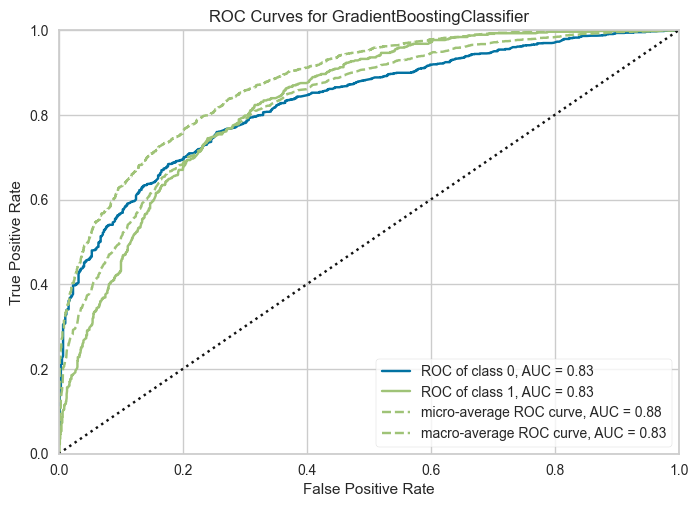

In [129]:
automl.plot_model(best_model)

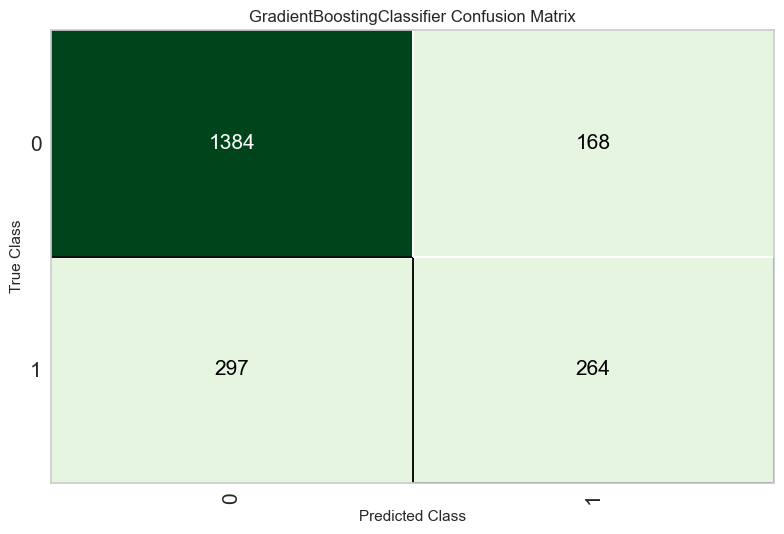

In [130]:
automl.plot_model(best_model, plot = 'confusion_matrix')

In [131]:
predictions = automl.predict_model(best_model, data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8150,0.8669,0.5206,0.7051,0.5990,0.4822,0.4916


In [132]:
predictions.head()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,TotalCharges_to_tenure,Churn,prediction_label,prediction_score
0,1,0,0,2,29.850000,29.850000,29.850000,0,1,0.5835
1,34,1,1,3,56.950001,1889.500000,55.573528,0,0,0.9422
2,2,1,0,3,53.849998,108.150002,54.075001,1,0,0.6311
3,45,0,1,0,42.299999,1840.750000,40.905556,0,0,0.9374
4,2,1,0,2,70.699997,151.649994,75.824997,1,1,0.6574


In [133]:
automl.save_model(best_model, 'pycaret_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tenure', 'PhoneService',
                                              'Contract', 'PaymentMethod',
                                              'MonthlyCharges', 'TotalCharges',
                                              'TotalCharges_to_tenure'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               v...
           

In [134]:
new_pycaret = ClassificationExperiment()
loaded_model = new_pycaret.load_model('pycaret_model')

Transformation Pipeline and Model Successfully Loaded


In [135]:
new_data = df.iloc[-2:-1]

In [136]:
new_pycaret.predict_model(loaded_model, new_data)

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,TotalCharges_to_tenure,Churn,prediction_label,prediction_score
7041,4,1,0,3,74.400002,306.600006,76.650002,1,0,0.5008


In [21]:
from IPython.display import Code
Code('predict_churn.py')

import pandas as pd
from pycaret.classification import predict_model, load_model

def predict_churn(input_data):
    # Load the saved model
    loaded_model = load_model('pycaret_model')
 
    input_data['TotalCharges_to_tenure'] = input_data['TotalCharges'] / input_data['tenure']
    
    # Make predictions on the input data
    predictions = predict_model(loaded_model, data=input_data)

    return predictions['prediction_score']

if __name__ == "__main__":
    new_data = pd.read_csv('new_churn_data.csv') 
    true_values = [1, 0, 0, 1, 0]  
    churn_probabilities = predict_churn(new_data)
    print("True Values:", true_values)
    print("Churn Probabilities:")
    print(churn_probabilities)

In [22]:
%run predict_churn.py

Transformation Pipeline and Model Successfully Loaded
True Values: [1, 0, 0, 1, 0]
Churn Probabilities:
0    0.5042
1    0.8151
2    0.8700
3    0.8113
4    0.5940
Name: prediction_score, dtype: float64


# Summary
In this project, I utilized PyCaret to explore various machine learning algorithms for churn prediction on prepared churn dataset. After evaluating different models, I selected the best-performing model based on accuracy as the chosen metric. I believe that this metric provides a comprehensive assessment of the model's performance and its practical impact on churn prediction efforts. This model was then saved to disk for future use. I also created a Python script/module with the predict_churn function, which takes a Pandas DataFrame as input and returns the probability of churn for each row. Finally, I tested the script with new data (new_churn_data.csv) and printed the churn probabilities for each entry.
Upon running the prediction module with the new data, I obtained the following results:

The model loaded successfully, indicating that the saved model was correctly loaded from disk.

The true values for the new data are [1, 0, 0, 1, 0], representing whether each customer churned or not.

The churn probabilities were calculated for each customer in the new data using the loaded model. The probabilities ranged from approximately 0.5042 to 0.8700, indicating the likelihood of churn for each customer.

In conclusion, the project successfully utilized PyCaret for churn prediction, saved the best model, and created a Python module for making predictions on new data. The provided probabilities can be used to assess the likelihood of churn for new customers.